### 1.	Preprocess your dataset. Indicate which steps worked and which didn’t. Include your thoughts on why certain steps worked and certain steps didn’t.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import csv

with open("../abalone.data") as infile, open("abalone.csv", "w") as outfile:
    csv_writer = csv.writer(outfile, delimiter=',')
    #create a row of titles
    csv_writer.writerow(['Sex','Length','Diameter','Height','Whole weight','Shucked weight',
                         'Viscera weight','Shell weight','Rings'])
    for line in infile:
        #check to see how the data is divided so you know what to split the line on
        row = [field.strip() for field in line.split(',')]
        csv_writer.writerow(row)

In [18]:
abalone_df = pd.read_csv('abalone.csv')
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [141]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [158]:
abalone_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [159]:
abalone_df.var()

Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
Rings             10.395266
dtype: float64

In [19]:
#nominal values
from sklearn.preprocessing import LabelEncoder

sex_labels = LabelEncoder()
abalone_df['Sex'] = sex_labels.fit_transform(abalone_df['Sex'].values)
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [143]:
abalone_df['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

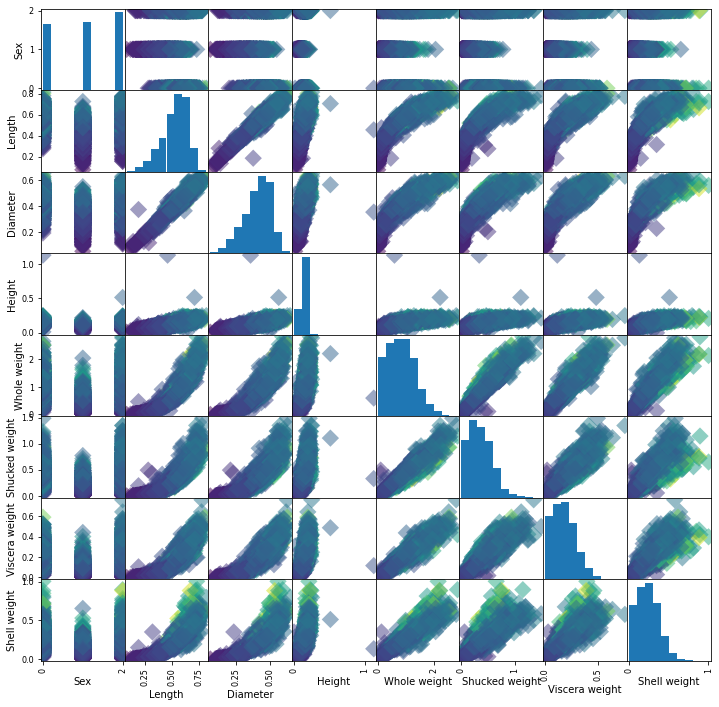

In [8]:
# exploratory data analysis
X = abalone_df.drop('Rings', axis =1)
y = abalone_df['Rings']

# target variable as argument to the parameter c, which stands for color
# ensuring that our data points in our figure will be colored by their species. 
# We also pass a list to fig size, which specifies the size of our figure, as well as a marker size and shape.

_=pd.plotting.scatter_matrix(X, c=y, figsize=[12,12], s=150, marker ='D')

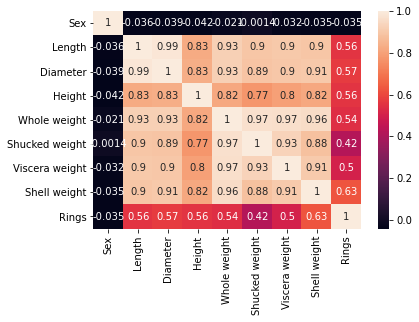

In [6]:
# create the correlation matrix
corrMatrix = abalone_df.corr()
#print (corrMatrix)

# use seaborn and matplotlib to create the visual representation
sns.heatmap(corrMatrix, annot=True)
plt.show()

[-0.          0.          0.          1.84232735  0.          0.
  0.          9.43981121]


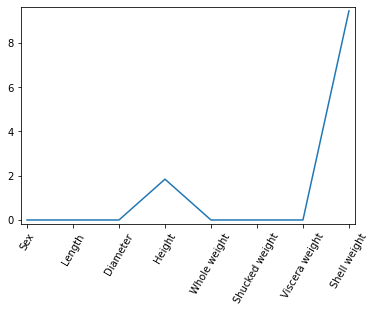

In [7]:
# Import Lasso
from sklearn.linear_model import Lasso

# need arrays and need to reshape them
X = abalone_df.drop('Rings', axis =1)
y = np.array(abalone_df['Rings']).reshape(-1,1)

abalone_df_columns= abalone_df.drop('Rings', axis=1).columns
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.01, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)

# Plot the coefficients
# coefficients are used for creating the regression equation y = mx + mx1 + mx2...+ mxn + b
plt.plot(range(len(abalone_df_columns)), lasso_coef)
plt.xticks(range(len(abalone_df_columns)), abalone_df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()
# so you can see X4, X5 and X7 are the least useful for predicting X3 because they are 0

### Preprocessing notes
* Per the exploratory data analysis: Features are not normally distributed
* Looking at the heat map: All of the weight measurements, height and length are all strongly correlated with each other. Definitely worthwhile to drop at least some of them. 
* Lasso regression indicates that heigh and shell weight may be my best options.
* There are no missing values.
* Standard Scaler was not helpful. My decision tree performed better with it off.

In [20]:
# import methods for initial decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = abalone_df.drop('Rings', axis =1)
y = abalone_df['Rings']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#Standardize
#sc= StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.fit_transform(X_test)

### Repeat feature selection with decision tree regressor

In [7]:
# decision tree regressor
dtr = DecisionTreeRegressor(random_state=42)

dtr = dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

# repeat feature selection to compare to Lasso regression
feature_imp = pd.Series(dtr.feature_importances_,index=abalone_df.drop('Rings', axis =1).columns).sort_values(ascending=False)
print(feature_imp)
print(dtr.n_features_)

from sklearn.metrics import classification_report, mean_squared_error as MSE

mse_score = MSE(y_test, y_pred)
rmse = mse_score**(1/2)
print('Test set RMSE of dtr: {:.2f}'.format(rmse))
accuracy_score = dtr.score(X_test, y_test)
print(accuracy_score)

Shell weight      0.508823
Shucked weight    0.165431
Whole weight      0.080425
Viscera weight    0.068029
Diameter          0.060290
Height            0.054829
Length            0.037011
Sex               0.025161
dtype: float64
8
Test set RMSE of dtr: 3.03
0.09540071006106876


In [12]:
X = abalone_df[['Height', 'Shell weight']]
y = abalone_df['Rings']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#Standardize
#sc= StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.fit_transform(X_test)

# decision tree regressor
dtr = DecisionTreeRegressor(random_state=42)

dtr = dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

mse_score = MSE(y_test, y_pred)
rmse = mse_score**(1/2)
print('MSE: {:.2f}'.format(mse_score))
print('Test set RMSE of dtr: {:.2f}'.format(rmse))
accuracy_score = dtr.score(X_test, y_test)
print(accuracy_score)

MSE: 9.56
Test set RMSE of dtr: 3.09
0.05823277487768752


### Tune the hyperparameters of the decision tree regressor

In [14]:
print(dtr.get_params())


{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [15]:
X = abalone_df[['Height', 'Shell weight']]
y = abalone_df['Rings']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#Standardize
#sc= StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.fit_transform(X_test)

from sklearn.model_selection import GridSearchCV
# define the grid of hyperparameters 'params_dt'
params_dt = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf': [4,8,10,12],
    'max_features': [1,2,3,4],
    'min_samples_split': [2,4,6,8],
    'min_impurity_decrease': [0.0,0.1,0.01,0.001,0.0001]
}
# instantiate a 10-fold CV grid search object
grid_dt = GridSearchCV(estimator =dtr,
                      param_grid=params_dt,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1)
# fit to the training data
grid_dt.fit(X_train, y_train)
#extract best hyperparameters
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters: ', best_hyperparams)


Best hyperparameters:  {'max_depth': 2, 'max_features': 1, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2}


/Users/brittanyminor/opt/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


In [21]:
X = abalone_df[['Shell weight']]
y = abalone_df['Rings']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#Standardize
#sc= StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.fit_transform(X_test)

# decision tree regressor
dtr = DecisionTreeRegressor(min_samples_leaf=4, random_state=1)
# tried with max_depth =2 but it does better with the default max_depth of None

dtr = dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

mse_score = MSE(y_test, y_pred)
rmse = mse_score**(1/2)
print('MSE: {:.2f}'.format(mse_score))
print('Test set RMSE of dtr: {:.2f}'.format(rmse))
accuracy_score = dtr.score(X_test, y_test)
print(accuracy_score)

MSE: 5.98
Test set RMSE of dtr: 2.45
0.41100221351050936


### Try eliminating outliers

In [29]:
from sklearn.neighbors import LocalOutlierFactor


X = np.array(abalone_df[['Shell weight']])
y = np.array(abalone_df['Rings'])

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

# decision tree regressor
dtr = DecisionTreeRegressor(min_samples_leaf=4, random_state=1)
# tried with max_depth =2 but it does better with the default max_depth of None

dtr = dtr.fit(X_train, y_train)
y_hat = dtr.predict(X_test)

# evaluate predictions

mse_score = MSE(y_test, y_hat)
rmse = mse_score**(1/2)
print('Test set RMSE of dtr: {:.2f}'.format(rmse))
accuracy_score = dtr.score(X_test, y_test)
print(accuracy_score)


(2923, 1) (2923,)
(1254, 1) (1254,)
(2295, 1) (2295,)
Test set RMSE of dtr: 2.51
0.37994458997506997


## Random Forest Regressor Model

In [148]:
X = abalone_df.drop('Rings', axis =1)
y = abalone_df['Rings']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor(random_state=42)

#define a grid of hyperparameters
params_rfr = {
    'n_estimators': [100,300,400,500],
    'max_depth': [4,6,8],
    'min_samples_leaf': [0.1,0.2,0.05],
    'max_features': ['log2','sqrt']
}

# instantiate grid_rfr
grid_rfr = GridSearchCV(estimator=rf,
                        param_grid=params_rfr,
                       cv=3,
                       scoring= 'neg_mean_squared_error',
                       verbose=1,
                       n_jobs=-1)
# fit grid_rfr to training set
grid_rfr.fit(X_train, y_train)
#extract best hyperparameters

best_hyperparams = grid_rfr.best_params_
print('Best hyperparameters:\n', best_hyperparams)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Users/brittanyminor/opt/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Best hyperparameters:
 {'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 0.05, 'n_estimators': 400}


In [149]:
# extract best model
best_model = grid_rfr.best_estimator_
#predict the test set labels
y_pred = best_model.predict(X_test)

rmse_test= MSE(y_test, y_pred)**(1/2)
print('MSE: {:.2f}'.format(mse_score))
print('Test set RMSE of rfr: {:.2f}'.format(rmse_test))

Test set RMSE of rfr: 2.74


### RFR with outliers removed

In [150]:
from sklearn.neighbors import LocalOutlierFactor


X = np.array(abalone_df.drop('Rings',axis =1))
y = np.array(abalone_df['Rings'])

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

rfr= RandomForestRegressor(random_state=42)

#define a grid of hyperparameters
params_rfr = {
    'n_estimators': [100,300,400,500],
    'max_depth': [4,6,8],
    'min_samples_leaf': [0.1,0.2,0.05],
    'max_features': ['log2','sqrt']
}

# instantiate grid_rfr
grid_rfr = GridSearchCV(estimator=rf,
                        param_grid=params_rfr,
                       cv=3,
                       scoring= 'neg_mean_squared_error',
                       verbose=1,
                       n_jobs=-1)
# fit grid_rfr to training set
grid_rfr.fit(X_train, y_train)
#extract best hyperparameters

best_hyperparams = grid_rfr.best_params_
print('Best hyperparameters:\n', best_hyperparams)

(2923, 8) (2923,)
(1254, 8) (1254,)
(2822, 8) (2822,)
Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Users/brittanyminor/opt/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Best hyperparameters:
 {'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 0.05, 'n_estimators': 300}


In [151]:
# extract best model
best_model = grid_rfr.best_estimator_
#predict the test set labels
y_pred = best_model.predict(X_test)

rmse_test= MSE(y_test, y_pred)**(1/2)
print('Test set RMSE of rfr: {:.2f}'.format(rmse_test))

Test set RMSE of rfr: 2.74


## Best RMSE score here
Used GradientBoostingRegressor instead of XGBoost because XGBoost kept killing my kernel

In [47]:
from sklearn.ensemble import GradientBoostingRegressor


X = np.array(abalone_df.drop('Rings',axis =1))
y = np.array(abalone_df['Rings'])

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# instantiate gradientboostingclassifier
sgbt = GradientBoostingRegressor(n_estimators=80, subsample=0.9, random_state=42)
                                 
sgbt.fit(X_train, y_train)

#feature selection
feature_imp = pd.Series(sgbt.feature_importances_,index=abalone_df.drop('Rings', axis =1).columns).sort_values(ascending=False)
print(feature_imp)
print(sgbt.n_features_)


y_pred = sgbt.predict(X_test)
mse_score= MSE(y_test, y_pred)
rmse_test= MSE(y_test, y_pred)**(1/2)
print('MSE: {:.2f}'.format(mse_score))
print('Test set RMSE of rfr: {:.2f}'.format(rmse_test))

Shell weight      0.655292
Shucked weight    0.160620
Whole weight      0.062640
Height            0.053368
Diameter          0.027174
Sex               0.020400
Length            0.012492
Viscera weight    0.008013
dtype: float64
8
MSE: 4.72
Test set RMSE of rfr: 2.17


Set subsample < 1 to make it stochastic gradient boosting, reduced estimators to 80 to improve MSE, even though intuitively more estimators should have made it better.

Trying running with feature selection

In [52]:
X = abalone_df[['Shell weight', 'Shucked weight']]
y = abalone_df['Rings']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# instantiate gradientboostingclassifier
sgbt = GradientBoostingRegressor(n_estimators=80, subsample=0.9, random_state=42)
                                 
sgbt.fit(X_train, y_train)

y_pred = sgbt.predict(X_test)
mse_score= MSE(y_test, y_pred)
rmse_test= MSE(y_test, y_pred)**(1/2)
print('MSE: {:.2f}'.format(mse_score))
print('Test set RMSE of rfr: {:.2f}'.format(rmse_test))

MSE: 4.86
Test set RMSE of rfr: 2.20


In [43]:
X = np.array(abalone_df.drop('Rings',axis =1))
y = np.array(abalone_df['Rings'])

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# instantiate gradientboostingclassifier
sgbt = GradientBoostingRegressor(n_estimators=300, random_state=42)
                                 
sgbt.fit(X_train, y_train)
y_pred = sgbt.predict(X_test)
mse_score= MSE(y_test, y_pred)
rmse_test= MSE(y_test, y_pred)**(1/2)
print('MSE: {:.2f}'.format(mse_score))
print('Test set RMSE of rfr: {:.2f}'.format(rmse_test))

MSE: 4.95
Test set RMSE of rfr: 2.22


In [42]:
X = abalone_df[['Shell weight', 'Height']]
y = abalone_df['Rings']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# instantiate gradientboostingclassifier

sgbt = GradientBoostingRegressor(subsample=.8, random_state=42)
                                 
sgbt.fit(X_train, y_train)
y_pred = sgbt.predict(X_test)
mse_score= MSE(y_test, y_pred)
rmse_test= MSE(y_test, y_pred)**(1/2)
print('MSE: {:.2f}'.format(mse_score))
print('Test set RMSE of rfr: {:.2f}'.format(rmse_test))

MSE: 5.89
Test set RMSE of rfr: 2.43


## Try converting data so that I can use decision tree classifier instead of regressor

In [153]:
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
# Create bins and bin labels for the Rings column

ring_bins = [0, 8, 10, 30]
ring_labels = ['under 9', '9-10', 'over 10']

# Bin the Rings column
# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
#pd.cut(abalone_df["Rings"], ring_bins, labels=ring_labels)
# We can append our bins to abalone_df

abalone_df["Ring Range"] = pd.cut(abalone_df["Rings"], ring_bins, labels=ring_labels)
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Ring Range
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,over 10
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,under 9
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,9-10
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,9-10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,under 9


In [40]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   int64   
 1   Length          4177 non-null   float64 
 2   Diameter        4177 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4177 non-null   float64 
 5   Shucked weight  4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4177 non-null   float64 
 8   Rings           4177 non-null   int64   
 9   Ring Range      4177 non-null   category
dtypes: category(1), float64(7), int64(2)
memory usage: 298.0 KB


In [72]:
abalone_df['Ring Range'].value_counts()

over 10    1447
under 9    1407
9-10       1323
Name: Ring Range, dtype: int64

In [6]:
# import methods for initial decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

to_drop = abalone_df[['Rings', 'Ring Range']]
X = abalone_df.drop(to_drop, axis =1)
y = abalone_df['Ring Range']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


# decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print('Baseline output')
print(classification_report(y_test, y_pred))

Baseline output
              precision    recall  f1-score   support

        9-10       0.43      0.44      0.43       403
     over 10       0.57      0.58      0.58       414
     under 9       0.71      0.68      0.70       437

    accuracy                           0.57      1254
   macro avg       0.57      0.57      0.57      1254
weighted avg       0.57      0.57      0.57      1254



### Tune hyperparameters and do feature selection

In [43]:
from sklearn.model_selection import GridSearchCV

to_drop = abalone_df[['Rings', 'Ring Range']]
X = abalone_df.drop(to_drop, axis =1)
y = abalone_df['Ring Range']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)



# define the grid of hyperparameters 'params_dt'
params_dt = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf': [4,8,10,12],
    'max_features': [1,2,3,4]
}
# instantiate a 10-fold CV grid search object
grid_dt = GridSearchCV(estimator =dtc,
                      param_grid=params_dt,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1)
# fit to the training data
grid_dt.fit(X_train, y_train)
#extract best hyperparameters
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters: ', best_hyperparams)

Best hyperparameters:  {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 8}


In [88]:
to_drop = abalone_df[['Rings', 'Ring Range']]
X = abalone_df.drop(to_drop, axis =1)
y = abalone_df['Ring Range']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)


# decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

#feature selection
feature_imp = pd.Series(dtc.feature_importances_,index=abalone_df.drop(to_drop, axis =1).columns).sort_values(ascending=False)
print(feature_imp)
print(dtc.n_features_)

print('Baseline output')
print(classification_report(y_test, y_pred))

Shell weight      0.360990
Shucked weight    0.157117
Viscera weight    0.117519
Whole weight      0.105391
Diameter          0.085226
Height            0.071021
Length            0.070117
Sex               0.032619
dtype: float64
8
Baseline output
              precision    recall  f1-score   support

        9-10       0.40      0.39      0.39       397
     over 10       0.58      0.56      0.57       435
     under 9       0.68      0.71      0.70       422

    accuracy                           0.56      1254
   macro avg       0.55      0.56      0.55      1254
weighted avg       0.56      0.56      0.56      1254



In [124]:
X = abalone_df[['Shell weight', 'Shucked weight', 'Viscera weight', 'Whole weight']]
y = abalone_df['Ring Range']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

dtc = DecisionTreeClassifier(random_state=42)

# define the grid of hyperparameters 'params_dt'
params_dt = {
    'max_depth': [2, 5, 8, 10],
    'min_samples_leaf': [1,2,6,8,10],
    'max_features': [1,2,3],
    'min_impurity_decrease': [0.0, 0.01,0.001, 0.0001]
}
# instantiate a 10-fold CV grid search object
grid_dt = GridSearchCV(estimator =dtc,
                      param_grid=params_dt,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1)
# fit to the training data
grid_dt.fit(X_train, y_train)
#extract best hyperparameters
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters: ', best_hyperparams)

Best hyperparameters:  {'max_depth': 8, 'max_features': 3, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 2}


In [132]:
X = abalone_df[['Shell weight', 'Shucked weight', 'Viscera weight','Whole weight']]
y = abalone_df['Ring Range']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# decision tree classifier
dtc = DecisionTreeClassifier(max_depth=8,min_samples_leaf=2, max_features=3, min_impurity_decrease=.001,random_state=42)

dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)


print('Baseline output')
print(classification_report(y_test, y_pred))

Baseline output
              precision    recall  f1-score   support

        9-10       0.50      0.50      0.50       397
     over 10       0.67      0.64      0.65       435
     under 9       0.71      0.74      0.72       422

    accuracy                           0.63      1254
   macro avg       0.63      0.63      0.63      1254
weighted avg       0.63      0.63      0.63      1254



In [128]:
X = abalone_df[['Shell weight','Shucked weight']]
y = abalone_df['Ring Range']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# decision tree classifier
dtc = DecisionTreeClassifier(max_depth=5,min_samples_leaf=4, min_impurity_decrease=.001, random_state=42)

dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)


print('Baseline output')
print(classification_report(y_test, y_pred))

Baseline output
              precision    recall  f1-score   support

        9-10       0.50      0.52      0.51       397
     over 10       0.70      0.58      0.63       435
     under 9       0.69      0.78      0.73       422

    accuracy                           0.63      1254
   macro avg       0.63      0.63      0.62      1254
weighted avg       0.63      0.63      0.63      1254



### Try outlier elimination

In [87]:


from sklearn.neighbors import LocalOutlierFactor


X = np.array(abalone_df[['Shell weight','Shucked weight','Height']])
y = np.array(abalone_df['Ring Range'])

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)


# decision tree classifier
dtc = DecisionTreeClassifier(max_depth=5, max_features=2, min_samples_leaf=8, random_state=1)

dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)


print('Baseline output')
print(classification_report(y_test, y_pred))

(2923, 3) (2923,)
(1254, 3) (1254,)
(2841, 3) (2841,)
Baseline output
              precision    recall  f1-score   support

        9-10       0.46      0.60      0.52       397
     over 10       0.68      0.56      0.61       435
     under 9       0.76      0.69      0.72       422

    accuracy                           0.61      1254
   macro avg       0.63      0.62      0.62      1254
weighted avg       0.64      0.61      0.62      1254



Outlier removal was not helpful

## Random Forest Classifier Model

In [135]:
to_drop = abalone_df[['Rings', 'Ring Range']]
X = abalone_df.drop(to_drop, axis =1)
y = abalone_df['Ring Range']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(random_state=42)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

feature_imp = pd.Series(rf.feature_importances_,index=abalone_df.drop(to_drop, axis=1).columns).sort_values(ascending=False)
feature_imp

Shell weight      0.192175
Whole weight      0.149241
Shucked weight    0.139141
Viscera weight    0.136409
Diameter          0.125360
Height            0.114775
Length            0.103822
Sex               0.039077
dtype: float64

In [155]:
to_drop = abalone_df[['Rings', 'Ring Range']]
X = abalone_df.drop(to_drop, axis =1)
y = abalone_df['Ring Range']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

rf=RandomForestClassifier(random_state=42)

# define a grid of hyperparameters
params_rf={
    'n_estimators': [100,200,300,400],
    'max_depth': [4,5,6,8],
    'min_samples_leaf': [.01,.1,.2,],
    'max_features': ['sqrt', 'log2']
}


# instantiatate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                      param_grid=params_rf,
                      cv=3,
                      scoring='accuracy',
                      verbose=1,
                      n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_hyperparams = grid_rf.best_params_
print('Best hyperparamenters:\n ', best_hyperparams)


Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best hyperparamenters:
  {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 0.01, 'n_estimators': 300}


### Best classifier results

In [156]:
#extract the best model
best_model = grid_rf.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        9-10       0.53      0.45      0.49       397
     over 10       0.68      0.74      0.70       435
     under 9       0.73      0.77      0.75       422

    accuracy                           0.66      1254
   macro avg       0.65      0.65      0.65      1254
weighted avg       0.65      0.66      0.65      1254



In [1]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

to_drop = abalone_df[['Rings', 'Ring Range']]
X = abalone_df.drop(to_drop, axis =1)
y = abalone_df['Ring Range']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

#fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)



NameError: name 'abalone_df' is not defined

#### My kernel dies every time I try to run xgboost :( 

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

to_drop = abalone_df[['Rings', 'Ring Range']]
X = abalone_df.drop(to_drop, axis =1)
y = abalone_df['Ring Range']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state=42)

# instantiate gradientboostingclassifier

sgbt = GradientBoostingClassifier(max_depth=1,
                                 subsample=0.8,
                                 max_features=0.2,
                                 n_estimators=300,
                                 random_state=42)
sgbt.fit(X_train, y_train)
y_pred = sgbt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        9-10       0.52      0.48      0.50       397
     over 10       0.68      0.67      0.67       435
     under 9       0.72      0.79      0.75       422

    accuracy                           0.65      1254
   macro avg       0.64      0.64      0.64      1254
weighted avg       0.64      0.65      0.64      1254

